   # Is Jazz Music More Interesting in a Cloudy Rainy Day?                 Data Science Tells You Yes.

## COGS 108 Final Project  ---Spring 6/13/2017

#### Project Created By:
A91069152
A92061304
A14200549
U07543106

## Introduction

### Background

    People in the world are greatly influenced by external environments, for example, nature, and more specifically, weather. We make conscious and rational decisions when weather changes---we have to cancel a picnic if it is going to rain in an hour; we also make unconscious ones--- we may have different preferences in different weathers, maybe because hot weather energize us so we want to go out and socialize, or maybe a rainy day reminds us of a sad story in the past. These all intuitively make sense, but is it really true?
    
    The correlation between weather and mood changes is researched by several studies. It is shown that individuals show significantly more helping behaviors when the amount of sunshine reaching earth is high (Cunningham 1947); pleasant weather (higher temperature or barometric pressure) was related to higher mood, better memory, and “broadened” cognitive style during the spring as time spent outside increased (Keller, Fredrickson 2005). Some other studies instead show that the effect of weather on mood is actully very small (Denissen, Penke 2008). However, all of these studies were done around 10 years ago, where the method of big data is not adopted by the researchers, and thus it leaves us space to do similar research with the tool of data science to see the result.
    
    Music industry has developed greatly with the help of data in the recent ten years. Companies like Pandora have a large set of data of every user so that they predict users' preferences and deliver music that will be liked to the users. However, beside users' long term preferences, they may have mood changes and thus prefer a certain music in a short moment. Some studies have been done to explore---in Context aware recommender systems model(CARS),two factors are evaluated: a)if a contextual factor (e.g., the traffic state) is relevant for their decision making task, and b) how they would rate an item assuming that a certain contextual condition (e.g., traffic is chaotic) holds. Using these evaluations it is possible to build an effective context-aware mobile recommender system (Baltrunas 2011). Anotehr Context-aware music recommendation system (CA-MRS) that exploits the fuzzy system, Bayesian networks and the utility theory in order to recommend appropriate music with respect to the context (Park 2006).
    
    Since weather could be a significant factor of what "context" a person is in, but at the same time is not studied in the recent 10 years with data science method, we in this study is interested in knowing how does weather influences people's preferences in music listening with data science method. Because of the complexity of population and weather types, as well as the limitation of the dataset, we control the researched group to San Diego County area.

### Hypothesis

    Based on a simple questionnaire survey we conduct to 50 friends around us in San Diego County area (questions asked: what is your favorite music type in clear, windy and rainy weather?), we hypothesize that weather will influence people's preferences on music: clear weathers tend to make people prefer {hip-pop}, while windy weather correlates to preference for {rock, jazz}, rainy weather correlates to {country, classic}

## Method & Process

### Datasets

1) Dataset Name: UCSD HPWREN Weather Database
Link to the dataset: https://hpwren.ucsd.edu
Number of observations: > 3 million lines of weather measurements from 2008-04-17 to 2015-04-05.
Description: (From the HPWREN home page) The High Performance Wireless Research and Education Network (HPWREN), a University of California San Diego partnership project led by the San Diego Supercomputer Center and the Scripps Institution of Oceanography's Institute of Geophysics and Planetary Physics, supports Internet-data applications in the research, education, and public safety realms.
Note: permission for data use granted from the HPWREN/WIFIRE project.


2) Dataset Name: Google Trends
Link to the dataset: trends.google.com
Number of observations: Weekly search statistics on different music genres from 2008-04-17 to 2015-04-05.
Description: (From the Wikipedia page for Google Trends) Google Trends is a public web facility of Google Inc., based on Google Search, that shows how often a particular search-term is entered relative to the total search-volume across various regions of the world, and in various languages.

### Set up

In [12]:
# Importing all libraries used. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import whiten

In [13]:
# Setting number of clusters for KMeans. 

num_clusters = 8

### Load & Clean Data

In [14]:
# Load all csvs as Pandas DataFrames

# Selected weather data from the HPWREN project, covering daily weather patterns from 2008-04-17 to 2015-04-07. 
# The total size of this database is about ten million entries. 
# This database is not open to the public; permission of data use have been granted. 
df = pd.read_csv("data/data-1496858435852.csv") 

# Google Trend data by weeks. Given that Google has hourly trend data, and calculates the weekly summary 
#   numbers based on them, we are effectiely using millions of data points. 
df_gt_jazz = pd.read_csv("data/jazz_by_week.csv")
df_gt_hh = pd.read_csv("data/hip-hop_by_week.csv")
df_gt_country = pd.read_csv("data/country_by_week.csv")
df_gt_rock = pd.read_csv("data/rock_by_week.csv")
df_gt_classical = pd.read_csv("data/classical_by_week.csv")

In [15]:
# Dropping all null columns. Dropping all coloumns containing '0's. 
# Dropping all rows with nulls. 

df_valid = df.dropna(axis=1,how='all').drop(["code","id","hail_accumulation","hail_duration","hail_intensity","rain_intensity","reference_voltage","supply_voltage"],axis=1)
df_valid = df_valid.dropna(axis=0, how='any')

In [16]:
# Whitening all dimensions in weather data to ensure integrity of clustering. 

air_pressure = whiten(df['air_pressure'])
air_temp = whiten(df['air_temp'])
avg_wind_speed = whiten(df['avg_wind_speed'])
rain_accumulation = whiten(df['rain_accumulation'])
rain_duration = whiten(df['rain_duration'])
relative_humidity = whiten(df['relative_humidity'])

In [17]:
# Preparing train data for sklearn KMeans. 

train_data = np.vstack([air_pressure,air_temp,avg_wind_speed,rain_duration,rain_accumulation,relative_humidity]).T

###  Data Vizualization

In [18]:
import warnings 
warnings.filterwarnings('ignore')

# Using sklearn API to standardize weather and Google Trends data to #std's. 

scaler_w = StandardScaler()
scaled_data_w = scaler_w.fit_transform(train_data)

scaler_gt = StandardScaler()
s_data_jazz = scaler_gt.fit_transform(df_gt_jazz['jazz'])
s_data_hh = scaler_gt.fit_transform(df_gt_hh['hip-hop'])
s_data_country = scaler_gt.fit_transform(df_gt_country['country'])
s_data_rock = scaler_gt.fit_transform(df_gt_rock['rock'])
s_data_classical = scaler_gt.fit_transform(df_gt_classical['classical'])

In [19]:
# Using KMeans to classify the weather data into 8 clusters. 

km = KMeans(n_clusters=num_clusters, random_state=13)
km.fit(scaled_data_w)

km.cluster_centers_

array([[-0.51705711, -0.64479241,  4.11783339,  0.28515137,  0.3062659 ,
         0.1279982 ],
       [ 0.31816219, -0.74386303, -0.09077266,  0.36639401,  2.63469041,
         0.20664765],
       [ 0.71357982, -0.92901575, -0.11744238, -0.30684263, -0.3778076 ,
         0.58231904],
       [-0.36108631, -0.50077389, -0.15898603,  1.39449548,  0.47397649,
         0.64554852],
       [ 0.66106876,  0.48465503,  0.23806626,  1.25572067,  0.28922131,
        -1.3938517 ],
       [-0.69537727,  0.05147613, -0.30404112, -0.66573313, -0.49904544,
         0.64167774],
       [-0.42476079,  1.46312001, -0.26313726, -0.59182088, -0.40963128,
        -0.78291654],
       [ 1.25932193,  0.36550294,  0.74158569, -0.48775331, -0.57996253,
        -1.70460195]])

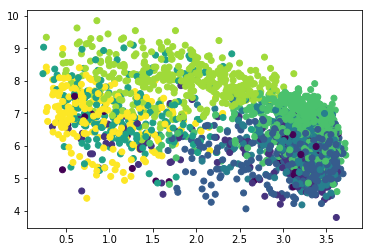

In [20]:
# Showing primilinary clustering to get a sense of where the clusters are. 

plt.scatter(relative_humidity, air_temp, c=km.labels_)
plt.show()

In [21]:
# Setting up a color dictionary for later use

color_dict = {0: 'red', 1:"orange", 2:"yellow", 3:"green", 4:"cyan", 5:"blue", 6:"purple", 7:"magenta"}

Below are the plots of all eight cluster centers, generated via an external script I have written for the UCSD's WIFIRE project. Due to the nature of the script, I decided not to paste the code here. I have used matplotlib and numpy in the script to generate the plot. 

![title](cluster_centers/centers.png)

### Analysis

In this section, we counted the number of occurences of each weather classes (8 of them) per week, and generated a histogram for visualization. We overlaid this histogram with search trends for each of the five music genres we proposed, in order to analyze visually the correlations between weather patterns and music genre preferences. 

#### Jazz

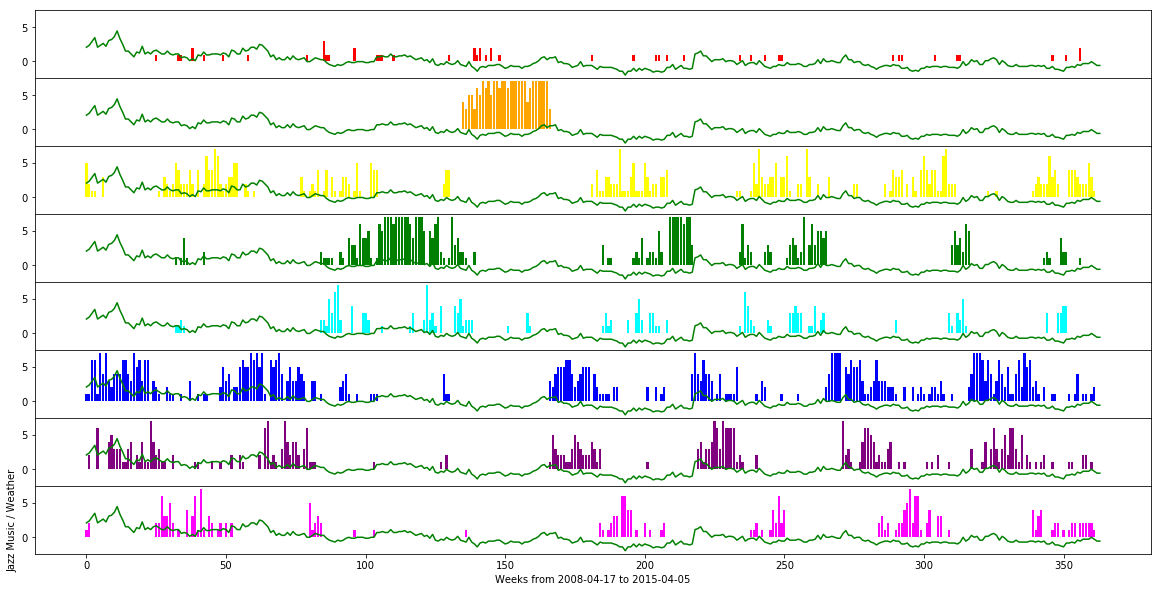

In [22]:
f, axarr = plt.subplots(8, figsize=(20,10), sharex=True, sharey=True)

for j in range(0,axarr.size):
    
    weeks = [0] * int(km.labels_.size/7+1)
    for i in range(0, km.labels_.size):
        if km.labels_[i] == j:
            weeks[int(i/7)] = weeks[int(i/7)] + 1
            
    axarr[j].plot(s_data_jazz, 'g')
    axarr[j].bar(range(0,int(km.labels_.size/7+1)), weeks, color=color_dict[j])
    

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
plt.xlabel("Weeks from 2008-04-17 to 2015-04-05")
plt.ylabel("Jazz Music / Weather")

plt.show()

#### Hip-Hop 

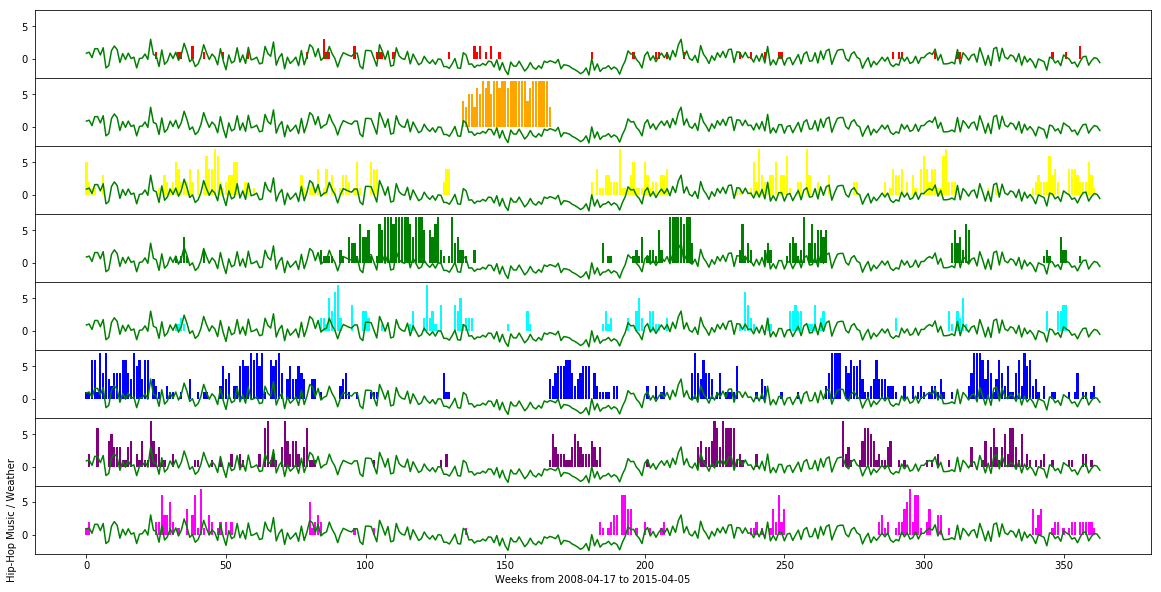

In [23]:
f, axarr = plt.subplots(8, figsize=(20,10), sharex=True, sharey=True)

for j in range(0,axarr.size):
    
    weeks = [0] * int(km.labels_.size/7+1)
    for i in range(0, km.labels_.size):
        if km.labels_[i] == j:
            weeks[int(i/7)] = weeks[int(i/7)] + 1
            
    axarr[j].plot(s_data_hh, 'g')
    axarr[j].bar(range(0,int(km.labels_.size/7+1)), weeks, color=color_dict[j])
    

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
plt.xlabel("Weeks from 2008-04-17 to 2015-04-05")
plt.ylabel("Hip-Hop Music / Weather")

plt.show()

#### Country Music

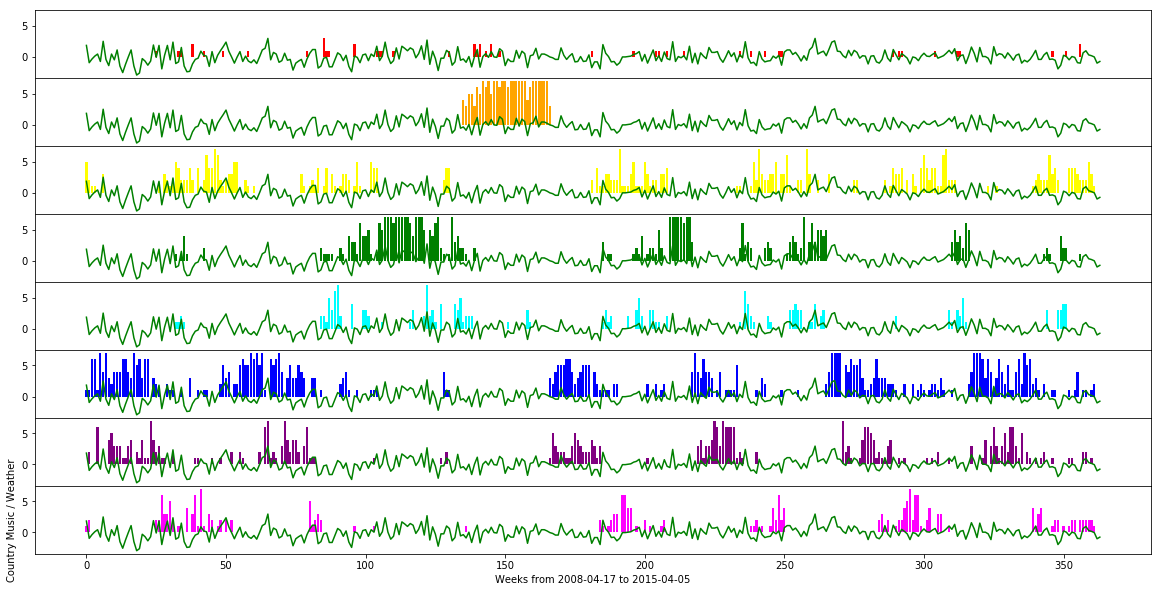

In [24]:
f, axarr = plt.subplots(8, figsize=(20,10), sharex=True, sharey=True)

for j in range(0,axarr.size):
    
    weeks = [0] * int(km.labels_.size/7+1)
    for i in range(0, km.labels_.size):
        if km.labels_[i] == j:
            weeks[int(i/7)] = weeks[int(i/7)] + 1
            
    axarr[j].plot(s_data_country, 'g')
    axarr[j].bar(range(0,int(km.labels_.size/7+1)), weeks, color=color_dict[j])
    

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
plt.xlabel("Weeks from 2008-04-17 to 2015-04-05")
plt.ylabel("Country Music / Weather")

plt.show()

#### Rock

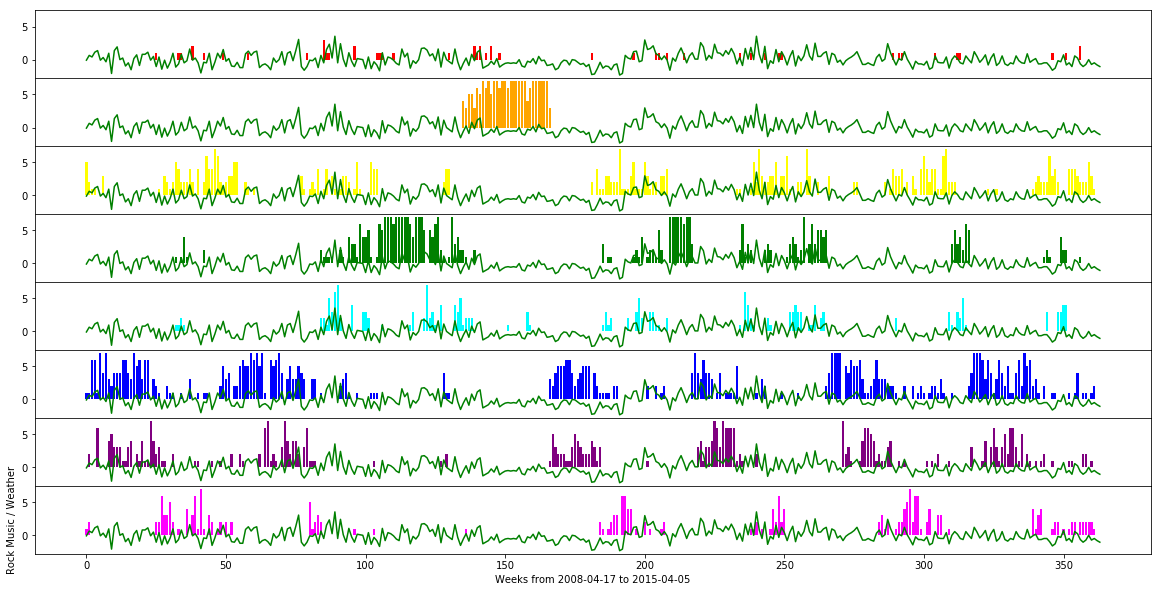

In [25]:
f, axarr = plt.subplots(8, figsize=(20,10), sharex=True, sharey=True)

for j in range(0,axarr.size):
    
    weeks = [0] * int(km.labels_.size/7+1)
    for i in range(0, km.labels_.size):
        if km.labels_[i] == j:
            weeks[int(i/7)] = weeks[int(i/7)] + 1
            
    axarr[j].plot(s_data_rock, 'g')
    axarr[j].bar(range(0,int(km.labels_.size/7+1)), weeks, color=color_dict[j])
    

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
plt.xlabel("Weeks from 2008-04-17 to 2015-04-05")
plt.ylabel("Rock Music / Weather")

plt.show()

#### Classical

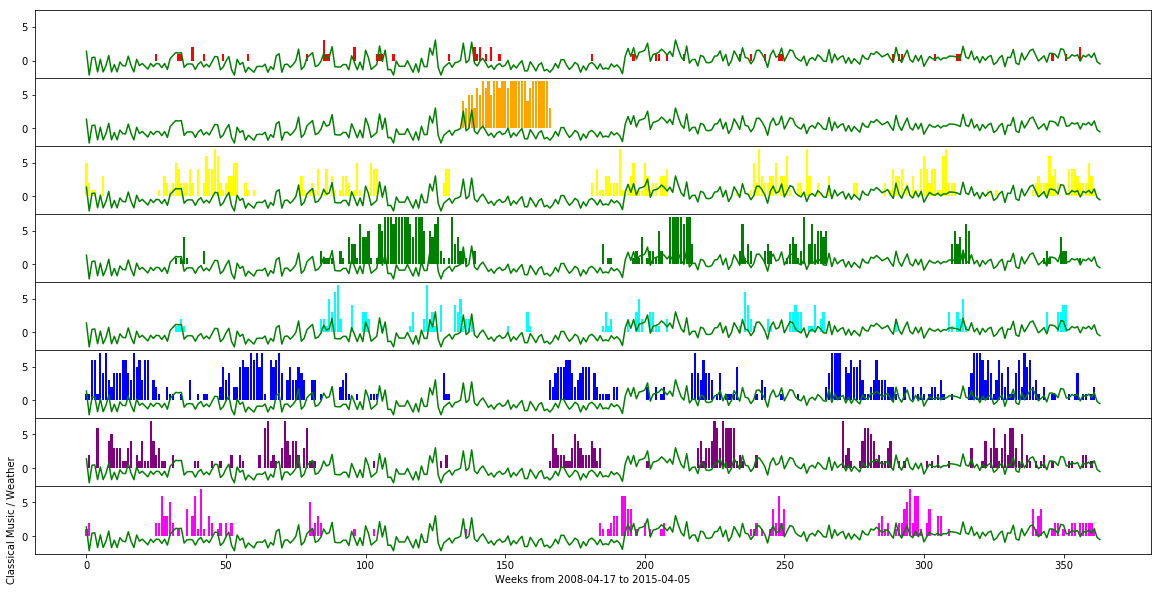

In [26]:
f, axarr = plt.subplots(8, figsize=(20,10), sharex=True, sharey=True)

for j in range(0,axarr.size):
    
    weeks = [0] * int(km.labels_.size/7+1)
    for i in range(0, km.labels_.size):
        if km.labels_[i] == j:
            weeks[int(i/7)] = weeks[int(i/7)] + 1
            
    axarr[j].plot(s_data_classical, 'g')
    axarr[j].bar(range(0,int(km.labels_.size/7+1)), weeks, color=color_dict[j])
    

f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    
plt.xlabel("Weeks from 2008-04-17 to 2015-04-05")
plt.ylabel("Classical Music / Weather")

plt.show()

## Results

#### Weather Classification

Based on factors of air pressure, relative humidity, air temprature, rain duration, average wind speed and rain accumulation, we classified 8 weathers as Windy, Stormy, Cold&Wet, Rainy&Cloudy, Mixed, Hot&Wet, Sunny, Extremely Sunny. These 8 weathers each corresponds in the same order to the trending plots from top to bottom.

For the trending plots, the green lines at the bottom of each row represent each music genre's searching amount, and is thus the same for all the rows within a trending plot. Different color cluster in each row represnet different weather: 
       
       Red - Windy, 
       Orange - Stormy, 
       Yellow - Cold&Wet, 
       Green - Rainy&Cloudy, 
       Cyan - Mixed, 
       Blue - Hot&Wet, 
       Purple - Sunny, 
       Pink - Extremely Sunny

#### Correlation

From visual observation of the plot, we can see that 

    1)Stormy weather is related with low amount of searching across from all music genres, except country music;
    2) Rainy-Cloudy weather is related with higher amount of searching of country, jazz and rock music;
    3) Sunny weather is related with lower amount of searching of jazz music.
    4) Windy weather is related with higher searching amount of classical and rock music.


#### Conclusion

From our observed correlations, there is indeed some relationship between preferences in music genre and the natural weather in San Diego County area. However, although these correlations can be spotified by eyes, we do not know if all of them are signifant without statistical tests.

Some of our hypothesis is right and some are wrong: 
1)clear weathers tend to make people prefer {hip-pop} is wrong, because there is no observed correlation between hip-hop music and sunny/extremely sunny weather.
2)windy weather correlates to preference for {rock, jazz} is wrong, because windy weather is instead related to classical and rock music searching.
3)rainy weather correlates to {country, classic} is partly right, because rainy-Cloudy weather is related with higher amount of searching of country, jazz and rock music.

## Discussion

It is interesting to see that there are some correlations between music types and weather types from pure observation. However, there are also potential issues of this study that can be improved:

1) Because of the complexity and uncertainty of the weather and music data, our group did not run statistical test on potential correlations, so that we do not know which observed relationship is significant. Not having a statistical test is propsed and allowed in our Project Proposal.

2) Although Google Trend is a comprehensive data source, there is still a risk equaling "preferences in music genre" with "high Google searching amount". For example, older people may not use google to find music they like, so that we do not know their preferences.

3) Some music is generally more popular than others, like country music is searched with high amount acorss weatehr types, while jazz music is hardly searched after 2012. Thus, to say how weather influences preferences in music, we should tey to eliminate the innate preference of that music type. For example, we can calculate the average searching amount of each genre, and get the difference between average and the amount under different weathers, and then run statistical test. however, due to time limit, we will do this as a follow-up study later.

This research will help music app company to not only deliver what is generally liked by consumers, but also the "preferred music" according to weather siuations to users.


## References

Cunningham, M. R. (1979). Weather, mood, and helping behavior: Quasi experiments with the sunshine samaritan. Journal of Personality and Social Psychology, 37(11), 1947.

Keller, M. C., Fredrickson, B. L., Ybarra, O., Côté, S., Johnson, K., Mikels, J., ... & Wager, T. (2005). A warm heart and a clear head: The contingent effects of weather on mood and cognition. Psychological Science, 16(9), 724-731.

Denissen, J. J., Butalid, L., Penke, L., & Van Aken, M. A. (2008). The effects of weather on daily mood: A multilevel approach. Emotion, 8(5), 662.Chicago	

Baltrunas, L., Kaminskas, M., Ludwig, B., Moling, O., Ricci, F., Aydin, A., ... & Schwaiger, R. (2011, August). Incarmusic: Context-aware music recommendations in a car. In International Conference on Electronic Commerce and Web Technologies (pp. 89-100). Springer Berlin Heidelberg.

Park, H. S., Yoo, J. O., & Cho, S. B. (2006, September). A context-aware music recommendation system using fuzzy bayesian networks with utility theory. In International Conference on Fuzzy Systems and Knowledge Discovery (pp. 970-979). Springer Berlin Heidelberg.
